In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Input
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
path = "C:\\Users\\kulka\\Downloads\\DL\\DL\\creditcardfraud-csv\\creditcard.csv"
dataset = pd.read_csv(path)

In [3]:
scaler = StandardScaler()
x = scaler.fit_transform(dataset.drop('Class',axis=1))
y = dataset['Class']

In [4]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,random_state=42,test_size=0.2)

In [5]:
input_dim = xtrain.shape[1]

In [7]:
encoder = Sequential([Input(shape=(input_dim,)),
                     Dense(32,activation="relu"),
                     Dense(16,activation="relu")])

decoder = Sequential([Input(shape=(16,)),
                     Dense(32,activation="relu"),
                     Dense(input_dim,activation="linear")])

autoencoder = Sequential([encoder,
                         decoder])

In [8]:
autoencoder.compile(optimizer="adam",loss="mean_squared_error")

In [9]:
autoencoder.fit(xtrain,xtrain,epochs=10,validation_data=(xtest,xtest),batch_size=32,shuffle=True)

Epoch 1/10
7121/7121 [==============================] - 13s 2ms/step - loss: 0.3235 - val_loss: 0.1930
Epoch 2/10
7121/7121 [==============================] - 12s 2ms/step - loss: 0.1647 - val_loss: 0.1279
Epoch 3/10
7121/7121 [==============================] - 13s 2ms/step - loss: 0.1162 - val_loss: 0.1030
Epoch 4/10
7121/7121 [==============================] - 13s 2ms/step - loss: 0.0943 - val_loss: 0.0921
Epoch 5/10
7121/7121 [==============================] - 13s 2ms/step - loss: 0.0809 - val_loss: 0.0783
Epoch 6/10
7121/7121 [==============================] - 12s 2ms/step - loss: 0.0744 - val_loss: 0.0705
Epoch 7/10
7121/7121 [==============================] - 13s 2ms/step - loss: 0.0699 - val_loss: 0.0634
Epoch 8/10
7121/7121 [==============================] - 12s 2ms/step - loss: 0.0675 - val_loss: 0.0643
Epoch 9/10
7121/7121 [==============================] - 13s 2ms/step - loss: 0.0646 - val_loss: 0.0577
Epoch 10/10
7121/7121 [==============================] - 13s 2ms/step - l

In [11]:
ypred = autoencoder.predict(xtest)
mse = np.mean(np.power(xtest - ypred,2),axis=1)

1781/1781 [==============================] - 2s 854us/step


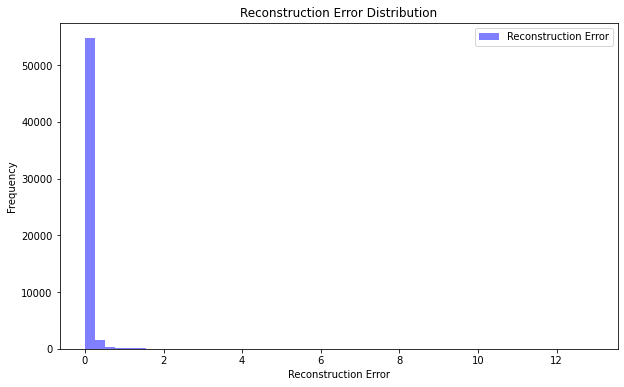

In [12]:
plt.figure(figsize=(10,6))
plt.hist(mse,bins=50,alpha=0.5,color='b',label='Reconstruction Error')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution')
plt.legend()
plt.show()

In [13]:
thresholds = np.arange(0.1,1.0,0.1)
for threshold in thresholds:
    anomalies = mse > threshold

In [16]:
num_anomalies = np.sum(anomalies)
print("Threshold:",threshold)
print("No. of anomalies:",num_anomalies)

Threshold: 0.9
No. of anomalies: 290


In [17]:
print("confusion matrix:")
print(confusion_matrix(ytest,anomalies))
print("--------------------------------------------------------------")
print("Classification Report:")
print(classification_report(ytest,anomalies))

confusion matrix:
[[56618   246]
 [   54    44]]
--------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.15      0.45      0.23        98

    accuracy                           0.99     56962
   macro avg       0.58      0.72      0.61     56962
weighted avg       1.00      0.99      1.00     56962



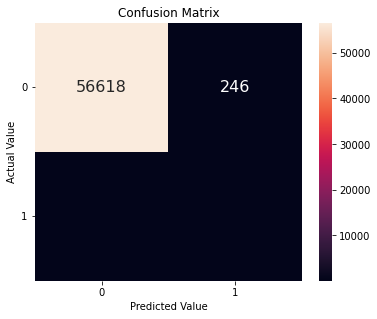

In [18]:
plt.figure(figsize=(6,4.75))
sns.heatmap(confusion_matrix(ytest,anomalies),annot=True,annot_kws={'size': 16},fmt='d')
plt.xticks([0.5,1.5],rotation='horizontal')
plt.yticks([0.5,1.5],rotation='horizontal')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()